#1

Euler's Method - Very easy to implement but has terrible accuracy great for solving a problem that cant be done analytically so it has to be done numerically - the pendulum problem

RK4 - A very accurate numerical integrator error h^4 but takes longer than other numerical methods such as Euler - RK4 is useful when you need a very accurate answer to a problem such as solving the N-Body problem

Backwards Euler - Implicit method and is very stable for most problems Allows for time step to get adjusted based on the problem you are solving. If we pick an initial time step that is too large or too small the adaptive time step will allow for some change that will best suit the problem (as long as we set up the thresholding correctly). But More evaluations per step thus causing more computational cost. Implicit methods are great for solving stiff equations because a large timestep can be used

Verlet Integration - Is useful because it directly relates the force to the position rather than solving the problem using velocities. Problems occur when multiple forces act on each particle. Great use is for molecular dynamics also no significant additional computational cost over the simple euler method

Adams-Moulton - Great at keeping error small over a long period of time for a problem uses less steps than rk4 and have large stability regions. Issue is you need to know prior steps and derivatives at those steps before solving for the next step. Alot of information is required about the problem and the function to solve. Worked great on N-body gravitational model where the error can grow quickly since Adams-moulton is great at keeping error in a problem like that small over time




#2
$$𝑥̈= − 𝑥 − 𝑣_𝑦$$

$$𝑦̈= − 𝑦 + 𝑣_x$$

$$𝑥(𝑡 = 0) = 1$$

$$𝑦(𝑡 = 1) = 0
$$

$$𝑣_𝑥
(𝑡 = 0) = 0
$$

$$𝑣_𝑦(𝑡 = 0) = 1
$$

two second order equations that are dependant on one another

Periodic solutions between -1:1 jagged occilations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint
#IC

x0 = 1
y1 = 0
dx0 = 0
dy0 = 1

In [ ]:
def dynamics(yvec,t):
    x = yvec[0]
    y = yvec[1]
    dx = yvec[2]
    dy = yvec[3]
    ddx = -x-dy
    ddy = -y+dx
    return np.array([dx,dy,ddx,ddy])

In [ ]:
tv0 = np.array([x0,y1,dx0,dy0])
tspan = np.linspace(0,100,100)
sol = odeint(dynamics,tv0,tspan)

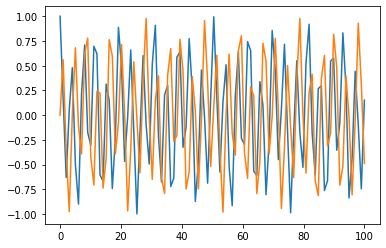

In [13]:
plt.plot(tspan,sol[:,0])
plt.plot(tspan,sol[:,1])
plt.show()

#3 

Java Code changed from the Molecular Dynamics sheet

The only differences between the two being a mass and force problem and not a charge problem. There is no spring potential since the objects are not connected and a different acceleration constant. The F_central gets changed to be dependent on mass not charge. Attached video is the output from the script for 6-body problem all with mass 1 and on plot of size 2

In [ ]:
import worldofdata.javaplots.SimplePlot;

public class RK4Molecule extends RK4Java {
	
	// what does "x" look like?
	//  blocks per atom of x y vx vy
	//    x -> x[i*4+0]
	//    y -> x[i*4+1]
	//    vx-> x[i*4+2]
	//    vy-> x[i*4+3]
	
	double l = 0.1;
	double m = 1.0;
	double k = 10.0;
	double kappa = 10.0;
	double q = 1.0;
	double gamma = 10.0;
	double alpha = 1.0;// dissipation term
	
	@Override
	public void derivs(double[] x, double[] der, double t) {
		//der[0] = x[1];
		//der[1] = -x[0];
		
		int nAtoms = x.length/4;
		for(int i =0; i<der.length;i++) der[i]=0;
		
		// Force interaction
		
		for(int i=0;i<nAtoms;i++) {
			double xi = x[i*4+0];
			double yi = x[i*4+1];
			for(int j=i+1;j<nAtoms;j++) {
				double xj = x[j*4+0];
				double yj = x[j*4+1];
				double dx = xj-xi;
				double dy = yj-yi;
				double dr = Math.sqrt(dx*dx+dy*dy);
				double acceleration_constant = kappa*m*m/(dr*dr*dr)/m;
				der[i*4+2] -= acceleration_constant*dx;
				der[i*4+3] -= acceleration_constant*dy;
				der[j*4+2] += acceleration_constant*dx;
				der[j*4+3] += acceleration_constant*dy;
				// der[i*4+2] -> ax[i]
			}
			// central potential to keep everything centered
			double dri = Math.sqrt(xi*xi+yi*yi);
			der[i*4+2] -= gamma*m*xi/dri;
			der[i*4+3] -= gamma*m*yi/dri;
		}
		
		/*
		// spring interactions
		for(int i=0;i<nAtoms-1;i++) {
			double xplus = x[(i+1)*4+0];
			double yplus = x[(i+1)*4+1];
			double xi = x[i*4+0];
			double yi = x[i*4+1];
			double dx = xplus-xi;
			double dy = yplus-yi;
			double dr = Math.sqrt(dx*dx+dy*dy);
			der[i*4+2] += k*(dr-l)*dx/dr;
			der[i*4+3] += k*(dr-l)*dy/dr;
			der[(i+1)*4+2] -= k*(dr-l)*dx/dr;
			der[(i+1)*4+3] -= k*(dr-l)*dy/dr;
			
		}*/
		
		// velocities
		for(int i=0;i<nAtoms;i++) {
			der[i*4+0] = x[i*4+2];
			der[i*4+1] = x[i*4+3];
		}
		
		//dissipation
		for(int i=0;i<nAtoms;i++) {
			der[i*4+2] -= alpha*x[i*4+2];
			der[i*4+3] -= alpha*x[i*4+3];
		}
	}
	
	public static double randRange(double a, double b) {
		return a+Math.random()*(b-a);
	}

	public static void runInLoop() {
		// initial conditions
		int nAtoms = 6;
		double size = .2;
		double [] x = new double[nAtoms*4];
		for(int i=0;i<nAtoms;i++) {
			x[i*4+0] = randRange(-size,size);
			x[i*4+1] = randRange(-size,size);
			x[i*4+2] = 0.0;
			x[i*4+3] = 0.0;
		}
		double [] xp = new double[nAtoms];
		double [] yp = new double[nAtoms];
		
		int nt = 1000000;
		double tmin = 0;
		double tmax = 1000.0;
		double [] tspan = linspace(tmin,tmax,nt);
		
		RK4Molecule theModel = new RK4Molecule();
		theModel.init(x);
		
		SimplePlot sp = new SimplePlot(600,600);
		sp.setPlotBounds(-10*size, 10*size, -10*size, 10*size);
		
		for(int i=1;i<nt;i++) {
			for(int j=0;j<nAtoms;j++) {
				xp[j] = theModel.x[j*4+0];
				yp[j] = theModel.x[j*4+1];
			}
			sp.setData(xp, yp, SimplePlot.Style.BOTH);
			sp.repaint();
			sp.sleep(1);
			theModel.RK4Step(tspan[i],tspan[i]-tspan[i-1]);
			
		}

	}

	public static void main(String[] args) {
		runInLoop();
	}
}
